# ARMA 

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt, dates as mdates, ticker as mticker
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../../My-Code/')

import timetools as tt

%matplotlib inline

In [2]:
# plt.rcParams['figure.figsize'] = (10, 7.5)
plt.style.use('seaborn')

## Simulate ARMA process (1,1) 

In [3]:
ar1 = np.array([1, 0.33])
ma1 = np.array([1, 0.9])

In [4]:
ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

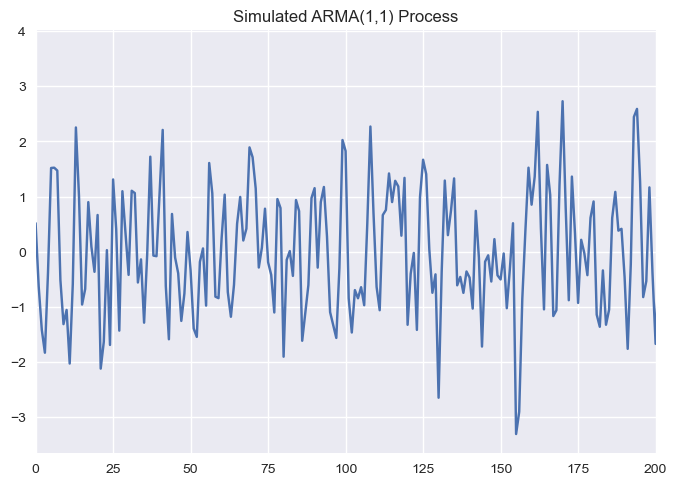

In [5]:
plt.plot(ARMA_1)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

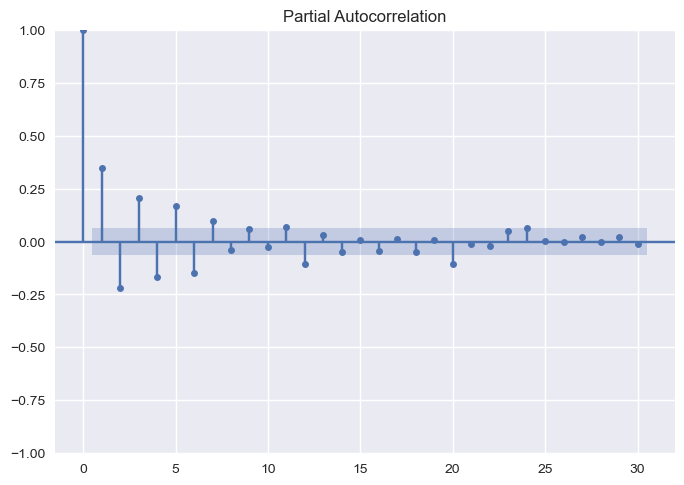

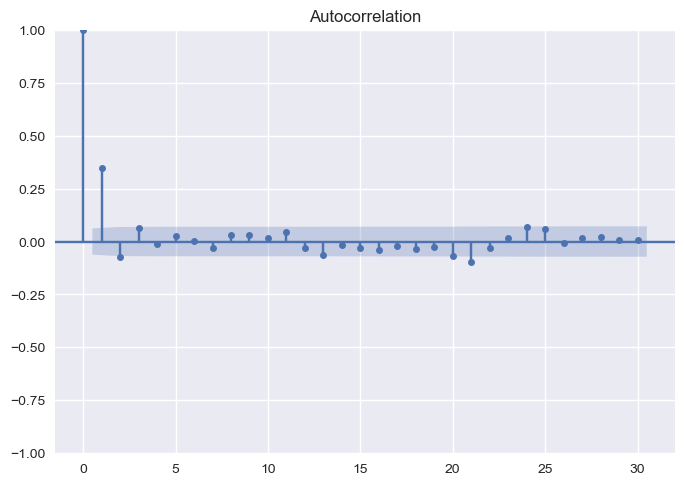

In [6]:
plot_pacf(ARMA_1);
plot_acf(ARMA_1);

## Simulate ARMA(2,2) process 

ar2 = [1.  0.5 0.8]
ma2 = [1.   0.33 0.45]


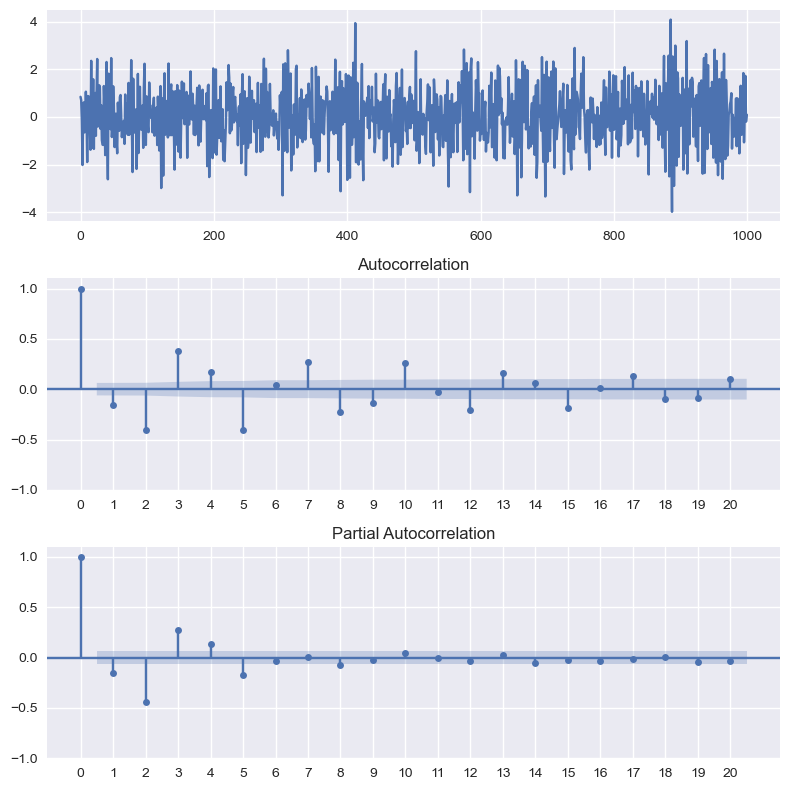

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1406.862
Date:                Sat, 07 Jan 2023   AIC                           2825.723
Time:                        18:20:30   BIC                           2855.152
Sample:                             0   HQIC                          2836.910
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0587      0.025      2.318      0.020       0.009       0.108
ar.L1         -0.5373      0.027    -19.585      0.000      -0.591      -0.484
ar.L2         -0.8530      0.027    -31.863      0.0

In [34]:
ar2 = np.array([1, 0.5, 0.8])
ma2 = np.array([1, 0.33, 0.45])
print('ar2 = {}'.format(ar2))
print('ma2 = {}'.format(ma2))
arma2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

ax1.plot(arma2_process);

plot_acf(arma2_process, lags=20, ax=ax2)
ax2.xaxis.set_major_locator(mticker.FixedLocator(np.arange(0, 21)))
ax2.set_ylim(-1, 1.1)

plot_pacf(arma2_process, lags=20, ax=ax3)
ax3.xaxis.set_major_locator(mticker.FixedLocator(np.arange(0, 21)));\
ax3.set_ylim(-1, 1.1)

plt.tight_layout()
plt.show()

model_arma2 = ARIMA(arma2_process, order=(2,0,2), enforce_stationarity=False).fit()
print(model_arma2.summary())

In [7]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0.9, 0.3])

In [8]:
ARMA_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=10000)

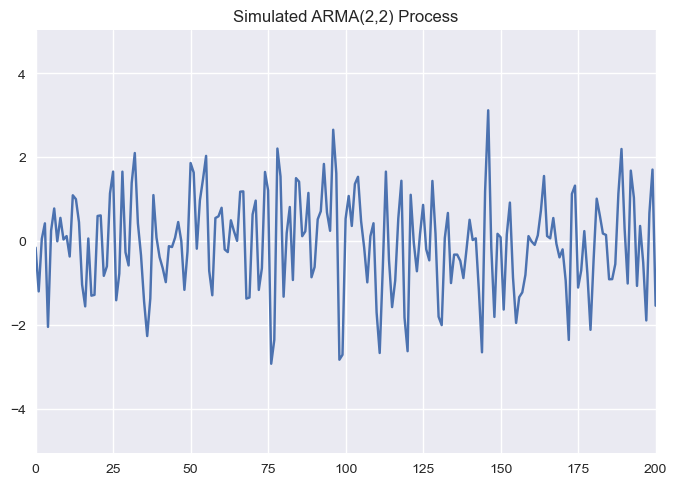

In [9]:
plt.plot(ARMA_2)
plt.title("Simulated ARMA(2,2) Process")
plt.xlim([0, 200])
plt.show()

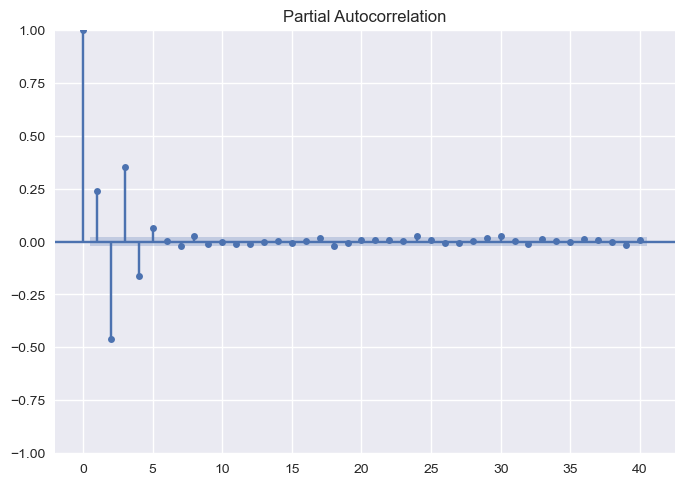

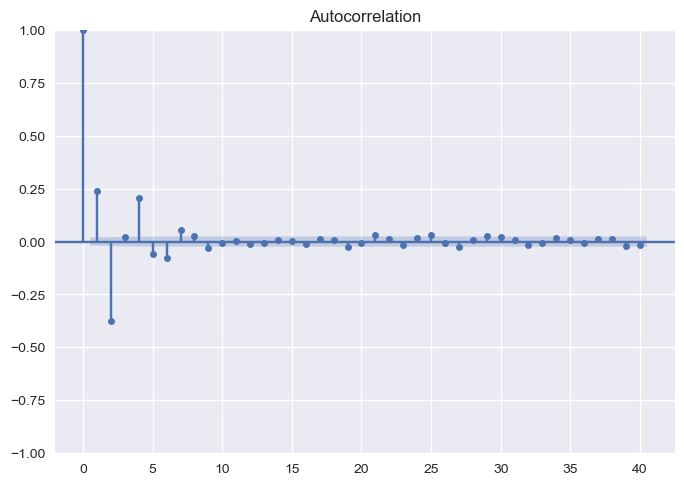

In [10]:
plot_pacf(ARMA_2);
plot_acf(ARMA_2);